In [1]:
import numpy as np
import pandas as pd

from IPython.display import display
#http://python.6.x6.nabble.com/IPython-User-ipython-notebook-how-to-display-image-not-from-pylab-td4497427.html

# plotting modules
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set(style='whitegrid', context='notebook')

# make sure charts appear in the notebook:
%matplotlib inline
%config InlineBackend.figure_format ='retina'

pd.set_option('display.max_columns', None)

In [2]:
df= 'C:/Users/mjors_000/Desktop/ECON628-01-berenger92/My_thesis_project/dataan.csv'
df= pd.read_csv(df, index_col= 'hhid')

In [3]:
df.isnull().sum()

region                         0
urbrur                         0
hhsize                         0
land_ownership                 0
land_area                      0
landcul                        0
landless                       0
TLU_total                      0
thhagasset                     0
hhdurval                       0
wealth                         0
wealth_urb                     0
wealth_rur                     0
femhead                        0
agehead                        0
hhlabor                        0
flabor                         0
flaborshare                    0
educadult                      0
educhead                       0
d_mobile                       0
d_computer                     0
d_internet                     0
electricity                    0
ownhome                        0
distprschool                   0
distsecschool                  0
disthealth                     0
distbus                        0
distroad                       0
          

In [4]:
df.dropna(axis = 0, inplace=True)
df.isnull().sum()

region                         0
urbrur                         0
hhsize                         0
land_ownership                 0
land_area                      0
landcul                        0
landless                       0
TLU_total                      0
thhagasset                     0
hhdurval                       0
wealth                         0
wealth_urb                     0
wealth_rur                     0
femhead                        0
agehead                        0
hhlabor                        0
flabor                         0
flaborshare                    0
educadult                      0
educhead                       0
d_mobile                       0
d_computer                     0
d_internet                     0
electricity                    0
ownhome                        0
distprschool                   0
distsecschool                  0
disthealth                     0
distbus                        0
distroad                       0
          

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3978 entries, 702 to 27012
Columns: 120 entries, region to modern_inputs
dtypes: float64(45), int64(75)
memory usage: 3.7 MB


In [6]:
## Define y
y = df['dum_organ_fert']

## Define X (exclude inc, incsq, log_inc)
columns_ = df.columns.tolist()
exclude_cols = ['pl', 'logagehead2', 'educadult', 'dum_organ_fert', 'ageheadsqure', 'dum_cropresid', 'l1_precip_z', 'dum_inorgan_fert', 'MVadoption', 'mixed_crop', 'modern_inputs', 'modern_inputs_1', 'd_imprseed' ] 
X = df[[i for i in columns_ if i not in exclude_cols]] 
## Print shapes of y and X
print y.shape, X.shape

(3978L,) (3978, 110)


In [7]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler() ## We are going to normalize

# use the "fit_transform" function to normalize the X dmatrix
Xn = ss.fit_transform(X)

In [8]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xn, y, test_size=0.3, random_state=10)
print X_train.shape, X_test.shape
print "\n======\n"
print y_train.shape, y_test.shape

(2784L, 110L) (1194L, 110L)


(2784L,) (1194L,)


C:\Users\mjors_000\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
from sklearn.linear_model import LinearRegression

## define a linear regression model
lr = LinearRegression()

## fit your model
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error



In [11]:
''' Function that calls the MSE and R^2 at once, using the name of the method and calling the best model'''

def rsquare_meansquare_error(train_y, test_y, train_X, test_X, test, best_model):
    """ first we need to predict on the test and train data"""
    y_train_pred = best_model.predict(train_X)
    y_test_pred = best_model.predict(test_X)
    
    """ We call the MSE in the following lines"""
    print ('MSE ' + test + ' train data: %.2f, test data: %.2f' % (
        mean_squared_error(train_y, y_train_pred),
        mean_squared_error(test_y, y_test_pred)))
    
    """ We call the R^2 in the following lines"""
    print('R^2 ' + test + ' train data: %.2f, test data: %.2f' % (
        r2_score(train_y, y_train_pred),
        r2_score(test_y, y_test_pred)))

In [12]:
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "OLS", lr)


MSE OLS train data: 0.20, test data: 234111882846175389286400.00
R^2 OLS train data: 0.20, test data: -940670412005586096881664.00


In [13]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV

In [14]:
## Find the optimal alpha
ridge_alphas = np.logspace(0, 5, 100)
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X_train, y_train)
print (optimal_ridge.alpha_)

756.463327555


In [15]:
## Implement the Ridge Regression
ridge = Ridge(alpha=optimal_ridge.alpha_)

## Fit the Ridge regression
ridge.fit(X_train, y_train)

Ridge(alpha=756.46332755462902, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

In [16]:
## Evaluate the Ridge Regression
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Ridge", ridge)

MSE Ridge train data: 0.20, test data: 0.21
R^2 Ridge train data: 0.19, test data: 0.17


In [17]:
## Find the optimal alpha
optimal_lasso = LassoCV(n_alphas=300, cv=10, verbose=1)
optimal_lasso.fit(X_train, y_train)
print optimal_lasso.alpha_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.00348716485274


In [18]:
## Implement the Lasso Regression
lasso = Lasso(alpha=optimal_lasso.alpha_)

## fit your regression
lasso.fit(X_train, y_train)


Lasso(alpha=0.0034871648527394247, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [19]:
## Evaluate the Lasso Regression
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Lasso", lasso)

MSE Lasso train data: 0.20, test data: 0.21
R^2 Lasso train data: 0.19, test data: 0.17


In [20]:
## Find the optimal alphas
l1_ratios = np.linspace(0.01, 1.0, 50)
optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=300, cv=5, verbose=1)
optimal_enet.fit(X_train, y_train)
print optimal_enet.alpha_
print optimal_enet.l1_ratio_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

0.252350547512
0.01


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  4.5min finished


In [21]:
##  Create a model Enet
enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)

## Fit your model
enet.fit(X_train, y_train)

ElasticNet(alpha=0.25235054751202224, copy_X=True, fit_intercept=True,
      l1_ratio=0.01, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

In [22]:
## Evaluate the Elastic Net Regression
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Elastic Net", enet)

MSE Elastic Net train data: 0.20, test data: 0.21
R^2 Elastic Net train data: 0.18, test data: 0.17


In [23]:
''' Here I am defining a function to print the coefficients, their absolute values and the non-absolute values'''
def best_reg_method(X, best_regulari):
    method_coefs = pd.DataFrame({'variable':X.columns, 
                                 'coef':best_regulari.coef_, 
                                 'abs_coef':np.abs(best_regulari.coef_)})
    method_coefs.sort_values('abs_coef', inplace=True, ascending=False)
    '''you can change the number inside head to display more or less variables'''
    return method_coefs.head(10)

In [24]:
best_reg_method(X, lasso)

,abs_coef,coef,variable
87,0.101525,-0.101525,l1_extra_temp29
31,0.081060,0.081060,agrassetNT
88,0.051188,0.051188,modern_inputs_1
94,0.050410,0.050410,ln_distextension_servoffice
81,0.041373,-0.041373,precip_z_high
96,0.028067,0.028067,ln_total_livstocksize
63,0.028013,-0.028013,distperiodic_market
84,0.026407,0.026407,precip_z_neg_yrbefore
89,0.024843,0.024843,ln_farmsize
108,0.024177,-0.024177,steepslope_topog


In [25]:
best_reg_method(X, ridge)

,abs_coef,coef,variable
87,0.045386,-0.045386,l1_extra_temp29
88,0.044626,0.044626,modern_inputs_1
31,0.041958,0.041958,agrassetNT
86,0.039934,-0.039934,extra_temp_max29
81,0.037396,-0.037396,precip_z_high
94,0.037214,0.037214,ln_distextension_servoffice
8,0.031405,0.031405,thhagasset
96,0.024250,0.024250,ln_total_livstocksize
108,0.022564,-0.022564,steepslope_topog
63,0.021270,-0.021270,distperiodic_market


In [26]:
best_reg_method(X, enet)

,abs_coef,coef,variable
87,0.045098,-0.045098,l1_extra_temp29
31,0.044452,0.044452,agrassetNT
88,0.043629,0.043629,modern_inputs_1
86,0.039887,-0.039887,extra_temp_max29
94,0.035284,0.035284,ln_distextension_servoffice
81,0.035251,-0.035251,precip_z_high
8,0.030553,0.030553,thhagasset
108,0.021648,-0.021648,steepslope_topog
63,0.021633,-0.021633,distperiodic_market
96,0.021282,0.021282,ln_total_livstocksize


In [27]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

## Here is the gridsearch
params = {"max_depth": [3,5,10,20],
          "max_features": [None, "auto"],
          "min_samples_leaf": [1, 3, 5, 7, 10],
          "min_samples_split": [2, 5, 7],
           "criterion" : ['mse']
         }

# ## Here crossvalidate 
from sklearn.grid_search import GridSearchCV
dtr_gs = GridSearchCV(dtr, params, n_jobs=-1, cv=5, verbose=1)

C:\Users\mjors_000\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [28]:
## Fit the regresion tree
dtr_gs.fit(X_train, y_train)


Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   30.9s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  1.4min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [None, 'auto'], 'min_samples_split': [2, 5, 7], 'criterion': ['mse'], 'max_depth': [3, 5, 10, 20], 'min_samples_leaf': [1, 3, 5, 7, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [29]:
## Print Best Estimator, parameters and score
''' dtr_best = is the regression tree regressor with best parameters/estimators'''
dtr_best = dtr_gs.best_estimator_ 

print "best estimator", dtr_best
print "\n==========\n"
print "best parameters",  dtr_gs.best_params_
print "\n==========\n"
print "best score", dtr_gs.best_score_


best estimator DecisionTreeRegressor(criterion='mse', max_depth=5, max_features='auto',
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')


best parameters {'max_features': 'auto', 'min_samples_split': 2, 'criterion': 'mse', 'max_depth': 5, 'min_samples_leaf': 10}


best score 0.0765655330295


In [30]:
## Print the features that best explain your Y
''' Here I am defining a function to print feature importance using best models'''
def feature_importance(X, best_model):
    feature_importance = pd.DataFrame({'feature':X.columns, 'importance':best_model.feature_importances_})
    feature_importance.sort_values('importance', ascending=False, inplace=True)
    return feature_importance

In [31]:
feature_importance(X, dtr_best)

,feature,importance
86,extra_temp_max29,0.276213
31,agrassetNT,0.133294
27,distbus,0.088510
8,thhagasset,0.086488
24,distprschool,0.066079
0,region,0.058403
7,TLU_total,0.037297
96,ln_total_livstocksize,0.035258
94,ln_distextension_servoffice,0.030316
90,ln_areacultiv,0.030160


In [32]:
## Predict 
y_pred_dtr= dtr_best.predict(X_test)
y_pred_dtr

## Evaluate the Regression Tree performance on your train and test data
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Regression tree", dtr_best)

MSE Regression tree train data: 0.19, test data: 0.22
R^2 Regression tree train data: 0.22, test data: 0.13


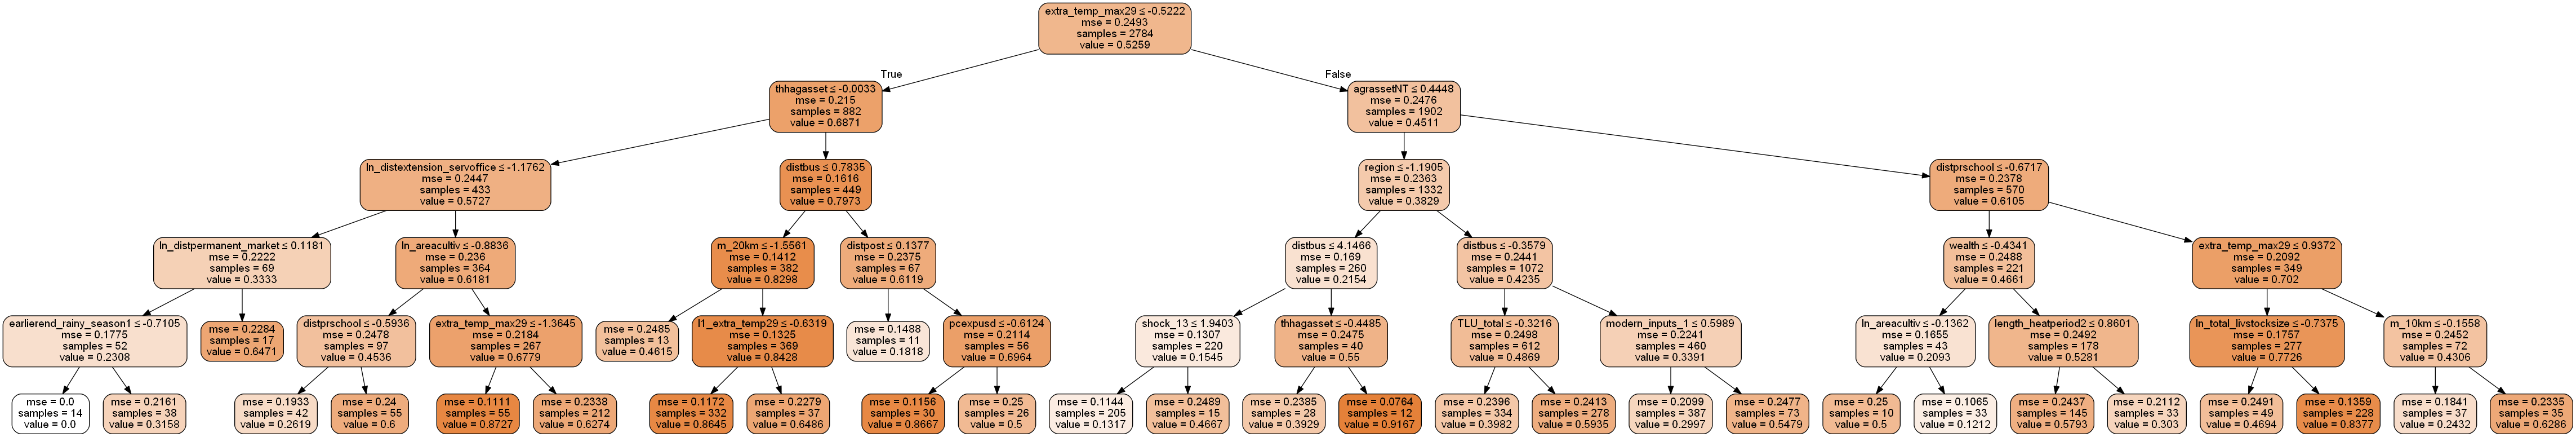

In [33]:
## Visualize your tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import pydot

dot_data = StringIO()
''' dtr_best was previously defined'''

## Graph
export_graphviz(dtr_best, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [34]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor( )

params = {'max_depth':[3,4,5],  
          'max_leaf_nodes':[5,6,7], 
          'min_samples_split':[3,4],
          'n_estimators': [100]
         }

estimator_rfr = GridSearchCV(forest, params, n_jobs=-1,  cv=5,verbose=1)

In [35]:
## Fit your random forest tree
estimator_rfr.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 18.7min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [3, 4], 'max_leaf_nodes': [5, 6, 7], 'n_estimators': [100], 'max_depth': [3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [36]:
## Print the best estimator, parameters and score
''' rfr_best = is the random forest regression tree regressor with best parameters/estimators'''
rfr_best = estimator_rfr.best_estimator_
print "best estimator", rfr_best
print "\n==========\n"
print "best parameters", estimator_rfr.best_params_
print "\n==========\n"
print "best score", estimator_rfr.best_score_

best estimator RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=7, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=3,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


best parameters {'min_samples_split': 3, 'max_leaf_nodes': 7, 'n_estimators': 100, 'max_depth': 5}


best score 0.133862315305


In [37]:
## Print the feauure importance
feature_importance(X, rfr_best)

,feature,importance
86,extra_temp_max29,0.207962
8,thhagasset,0.179201
87,l1_extra_temp29,0.121858
31,agrassetNT,0.117153
0,region,0.094101
24,distprschool,0.052745
88,modern_inputs_1,0.037642
63,distperiodic_market,0.032764
28,distroad,0.021696
12,wealth_rur,0.017664


In [38]:
## Predict
y_pred_rfdtr= rfr_best.predict(X_test)
y_pred_rfdtr
## Evaluate your model
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Random Forest Regression tree", rfr_best)

MSE Random Forest Regression tree train data: 0.21, test data: 0.21
R^2 Random Forest Regression tree train data: 0.18, test data: 0.17
